In [4]:
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import sys
import os
import glob
import shutil
import logging
import time
import subprocess
import copy

In [5]:
X_train=np.load('X_train.npy')
y_train=np.load('y_train.npy')
X_val=np.load('X_val.npy')
y_val=np.load('y_val.npy')

In [25]:
from tensorflow import keras
import tensorflow as tf
keras.backend.clear_session()

In [36]:
from tensorflow.keras import layers

model=tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=7, strides=(1, 1), input_shape=(1000,21,1), activation='relu'),
    #layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=7, strides=(1, 1), input_shape=(1000,21,1), activation='relu'),
    #layers.BatchNormalization(),
    
    layers.Conv2D(filters=128, kernel_size=7, strides=(1, 1), input_shape=(1000,21,1), activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Flatten(),

    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.2),

    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.2),

    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.2),

    layers.Dense(2, activation='sigmoid'),

])

In [26]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Concatenate, Dropout
from tensorflow.keras.models import Model

input_layer = Input(shape=(1000, 21, 1))

conv1 = Conv2D(filters=128, kernel_size=(4, 21), strides=(1, 1), padding='valid', activation='relu')(input_layer)
conv2 = Conv2D(filters=128, kernel_size=(8, 21), strides=(1, 1), padding='valid', activation='relu')(input_layer)
conv3 = Conv2D(filters=128, kernel_size=(16, 21), strides=(1, 1), padding='valid', activation='relu')(input_layer)
#conv4 = Conv2D(filters=128, kernel_size=(32, 21), strides=(1, 1), padding='valid', activation='relu')(input_layer)

pool1 = MaxPooling2D(pool_size=(997, 1))(conv1)
pool2 = MaxPooling2D(pool_size=(993, 1))(conv2)
pool3 = MaxPooling2D(pool_size=(985, 1))(conv3)
#pool4 = MaxPooling2D(pool_size=(969, 1))(conv4)

flatten1 = Flatten()(pool1)
flatten2 = Flatten()(pool2)
flatten3 = Flatten()(pool3)
#flatten4 = Flatten()(pool4)

bn1 = BatchNormalization()(flatten1)
bn2 = BatchNormalization()(flatten2)
bn3 = BatchNormalization()(flatten3)
#bn4 = BatchNormalization()(flatten4)

concat = Concatenate()([bn1, bn2, bn3])

dense1 = Dense(256)(concat)
bn4 = BatchNormalization()(dense1)
act1 = Activation('relu')(bn4)
dropout1= Dropout(0.3)(act1)

dense2 = Dense(256)(dropout1)
bn5 = BatchNormalization()(dense2)
act2 = Activation('relu')(bn5)
dropout2=Dropout(0.3)(act2)

dense3 = Dense(256)(dropout2)
bn6 = BatchNormalization()(dense3)
act3 = Activation('relu')(bn6)
dropout3=Dropout(0.3)(act3)

output_layer = Dense(2, activation='sigmoid')(dropout3)

model = Model(inputs=input_layer, outputs=output_layer)


In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1000, 21, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 997, 1, 128)  10880       ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 993, 1, 128)  21632       ['input_1[0][0]']                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 985, 1, 128)  43136       ['input_1[0][0]']            

In [28]:
#with batch size mentioned
#with early stopping

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model.compile(
    optimizer=tf.keras.optimizers.SGD(lr=0.1),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val,y_val),
    batch_size=128,
    callbacks=[early_stopping],
    epochs=40)

Epoch 1/40


2023-04-05 16:55:39.643838: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 5453196000 exceeds 10% of free system memory.


507/508 [============================>.] - ETA: 0s - loss: 0.6107 - binary_accuracy: 0.6697

2023-04-05 16:57:11.992760: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1363320000 exceeds 10% of free system memory.


508/508 [==============================] - 96s 186ms/step - loss: 0.6107 - binary_accuracy: 0.6697 - val_loss: 0.6431 - val_binary_accuracy: 0.6266
Epoch 2/40
508/508 [==============================] - 92s 182ms/step - loss: 0.5357 - binary_accuracy: 0.7294 - val_loss: 0.5132 - val_binary_accuracy: 0.7428
Epoch 3/40
508/508 [==============================] - 95s 188ms/step - loss: 0.4978 - binary_accuracy: 0.7579 - val_loss: 0.5078 - val_binary_accuracy: 0.7506
Epoch 4/40
508/508 [==============================] - 101s 199ms/step - loss: 0.4668 - binary_accuracy: 0.7790 - val_loss: 0.4974 - val_binary_accuracy: 0.7596
Epoch 5/40
508/508 [==============================] - 105s 207ms/step - loss: 0.4371 - binary_accuracy: 0.7975 - val_loss: 0.5021 - val_binary_accuracy: 0.7624
Epoch 6/40
508/508 [==============================] - 107s 211ms/step - loss: 0.4144 - binary_accuracy: 0.8109 - val_loss: 0.5107 - val_binary_accuracy: 0.7605
Epoch 7/40
508/508 [==============================] - 

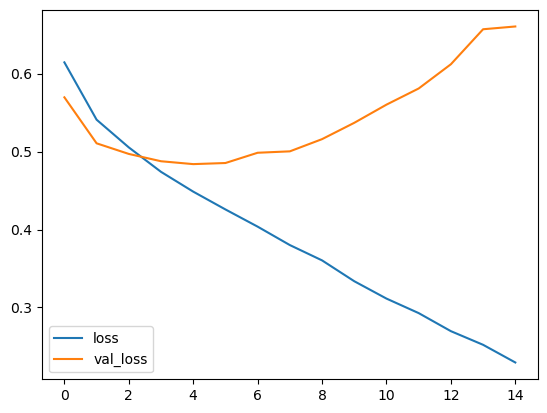

In [13]:
# Show the learning curves
import matplotlib
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

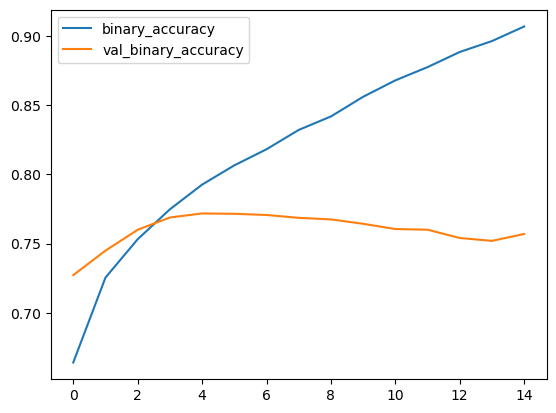

In [14]:
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [ ]:
torch.cuda.empty_cache

<function torch.cuda.memory.empty_cache() -> None>

In [16]:
X_train.shape

(64919, 1000, 21, 1)

In [21]:
np.unique(y_val[:,1], return_counts=True)

(array([0., 1.]), array([9989, 6241]))